In [1]:
import numpy as np
import irreducible_library as irr
import os, sys
import matplotlib.pyplot as plt
import scipy
%matplotlib inline
%load_ext autoreload
plt.style.use('default')
from matplotlib import rc, rcParams
from irreducible_library import relic, relic_ann, relic_plas
# Make use of TeX\ufeff
#rc('text',usetex=True)
# Change all fonts to ‘Computer Modern’
rc('font',**{'size':14, 'family':'serif','serif':['Times New Roman']})

In [42]:
def relic_ann(Q, mx, whole_shebang=False, muon=True, noQ = False):
    """ 
    Given a value of Q and mx returns the number density over relic abundance due to e+e- annihilations.
    """
    Tlist = np.logspace(2.5, -5,num=500)
    gamma_list = [irr.gamma_ann(Q, mx, i,muon=muon, noQ = noQ) for i in Tlist]
    gamma=scipy.interpolate.interp1d(Tlist, gamma_list, fill_value = 'extrapolate')
    alist = np.logspace(-1.9, 4.5,num=500)
    
    if noQ:
        # This section is for plotting lines of constant abundance by solving a modified boltzmann
        # equation and not using scaling arguments.
        if mx < 0.001:
            gulu = scipy.integrate.odeint(lambda logn, a: \
                - 3/a +2/(np.exp(logn)*a*irr.H(a))*gamma(irr.T(a)), [np.log(6e-05/10**(-30))], alist)
        else:
            gulu = scipy.integrate.odeint(lambda logn, a: \
                - 3/a +2/(np.exp(logn)*a*irr.H(a))*gamma(irr.T(a)), [np.log(6e-05/10**(-22))], alist)
        #print("This function is returning (nDM(modified no Q) final, a_max)")
        return np.array([np.exp(gulu[-1][-1]),alist[-1]])
    else:
        if Q<10e-14:
            gulu = scipy.integrate.odeint(lambda logn, a: \
                - 3/a +2/(np.exp(logn)*a*irr.H(a))*gamma(irr.T(a)), [-50], alist,mxhnil = 0)
        else:
            gulu = scipy.integrate.odeint(lambda logn, a: \
                - 3/a +2/(np.exp(logn)*a*irr.H(a))*gamma(irr.T(a)), [-20], alist,mxhnil = 0)
        if whole_shebang:
            print(np.exp(gulu[-1])/irr.nxrelic(mx, irr.T(100))*alist[-1]**3/100**3)
            return np.exp(gulu).flatten()
        else:
            return np.exp(np.squeeze(gulu[-1]))/irr.nxrelic(mx, irr.T(100))*alist[-1]**3/100**3

def relic_plas(Q, mx, whole_shebang=False, noQ = False, IC = False):
    
    Tlist = np.logspace(2.5, -5, num = 500)
    gamma_list = [irr.gamma_long(Q, mx, i, noQ = noQ)+irr.gamma_trans(Q, mx, i,noQ = noQ) for i in Tlist]
    gamma=scipy.interpolate.interp1d(Tlist, gamma_list, fill_value = 'extrapolate')
    alist = np.logspace(-1.9, 4.5, num = 500)
    
    if noQ:
        # This section is for plotting lines of constant abundance by solving a modified boltzmann
        # equation and not using scaling arguments.
        if mx < 0.001:
            gulu = scipy.integrate.odeint(lambda logn, a: \
                - 3/a +2/(np.exp(logn)*a*irr.H(a))*gamma(irr.T(a)), [np.log(6e-05/10**(-22))], alist)
        else:
            gulu = scipy.integrate.odeint(lambda logn, a: \
                - 3/a +2/(np.exp(logn)*a*irr.H(a))*gamma(irr.T(a)), [np.log(6e-05/10**(-22))], alist)
        #print("This function is returning (nDM(modified no Q) final, a_max)")
        return np.array([np.exp(gulu[-1][-1]),alist[-1]])
    else:
        if Q < 10e-14:
            gulu = scipy.integrate.odeint(lambda logn, a: \
                - 3/a +2/(np.exp(logn)*a*irr.H(a))*gamma(irr.T(a)), [-40], alist)
        else:
            gulu = scipy.integrate.odeint(lambda logn, a: \
                - 3/a +2/(np.exp(logn)*a*irr.H(a))*gamma(irr.T(a)), [-20], alist)
        if whole_shebang:
            print(np.exp(gulu[-1])/irr.nxrelic(mx, irr.T(100))*alist[-1]**3/100**3)
            return np.exp(gulu).flatten()
        else:
            return np.exp(np.squeeze(gulu[-1]))/irr.nxrelic(mx, irr.T(100))*alist[-1]**3/100**3


In [84]:
#relic40_new =relic(3.6e-11, 0.04, whole_shebang=True)
#relic40_old = old_relic(3.6e-11, 0.04,whole_shebang = True)
relic_ann40m14 = irr.relic_ann(10e-14, 4e-5,whole_shebang = True)
relic_ann40m15 = irr.relic_ann(10e-15, 4e-5,whole_shebang = True)
relic_ann40m17 = irr.relic_ann(10e-17, 4e-5,whole_shebang = True)
#relic_ann40_old = old_relic_ann(3.6e-11, 0.04,whole_shebang = True)
#relic_plas40_new = relic_plas(3.6e-11, 0.04,whole_shebang = True)
#relic_plas40_old = old_relic_plas(3.6e-11, 0.04,whole_shebang = True)

[2.33866726e-09]
[2.33859897e-11]
[2.33851619e-15]


In [85]:
relic_plas40m14 = irr.relic_plas(10e-14, 4e-5,whole_shebang = True)
relic_plas40m15 = irr.relic_plas(10e-15, 4e-5,whole_shebang = True)
relic_plas40m17 = irr.relic_plas(10e-17, 4e-5,whole_shebang = True)

/Users/ellailes/Code/Irreducible-mcp/irreducible_library.py:454: RuntimeWarning: overflow encountered in exp
  /(3*wt*mt**2 *(np.exp(wt/T)-1))


[2.44039375e-08]
[2.44039699e-10]
[2.44043741e-14]


In [86]:
relic_40m14 = irr.relic(10e-14, 4e-5,whole_shebang = True)
relic_40m15 = irr.relic(10e-15, 4e-5,whole_shebang = True)
relic_40m17 = irr.relic(10e-17, 4e-5,whole_shebang = True)

[2.67421225e-08]
[2.67429704e-10]
[2.67430762e-14]


In [5]:
#relic_small = irr.relic(10e-12, 4e-12,whole_shebang = True)
relic_annsmall1 = irr.relic_ann(10e-12, 4e-12,whole_shebang = True)
relic_annsmall2 = irr.relic_ann(10e-12, 4e-9,whole_shebang = True)
relic_annsmall3 = irr.relic_ann(10e-12, 4e-6,whole_shebang = True)
#relic__plassmall = irr.relic_plas(10e-12, 4e-12,whole_shebang = True)

[2.33852015e-12]
[2.33852015e-09]
[2.3385294e-06]


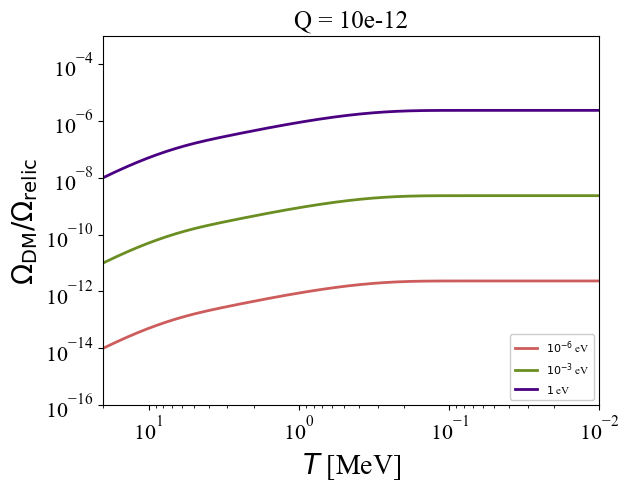

In [12]:
f, ax = plt.subplots()
alist = np.logspace(-1.9, 4.5,num = 500)
#ax.loglog(irr.T(alist), relic40_new/irr.nxrelic(0.04, irr.T(100))*alist**3/100**3,lw=2,c='SlateBlue',label = 'Total')
#ax.loglog(irr.T(alist), relic_plas40_new/irr.nxrelic(0.04, irr.T(100))*alist**3/100**3,lw=2,c='mediumvioletred',label = '$\gamma$')
ax.loglog(irr.T(alist), relic_annsmall1/irr.nxrelic(4e-12, irr.T(100))*alist**3/100**3,lw=2,c='IndianRed',label = r'$10^{-6}$ eV')
ax.loglog(irr.T(alist), relic_annsmall2/irr.nxrelic(4e-9, irr.T(100))*alist**3/100**3,lw=2,c='olivedrab',label = r'$10^{-3}$ eV')
ax.loglog(irr.T(alist), relic_annsmall3/irr.nxrelic(4e-6, irr.T(100))*alist**3/100**3,lw=2,c='indigo',label = r'$1$ eV')
ax.loglog(irr.T(alist), np.ones_like(alist), lw=3, c='gray', alpha=0.5)

ax.set_ylabel(r'$\Omega_\mathrm{DM}/\Omega_\mathrm{relic}$', fontsize=20)
ax.set_xlabel(r'$T$ [MeV]', fontsize=20)
ax.set_title(r'Q = 10e-12', fontsize=18)
ax.set_xlim([20,0.01])
ax.set_ylim([10e-17, 10e-4])
#ax.set_xticklabels(xticklabels,fontsize=16)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)

#ax.vlines(scipy.optimize.fsolve(lambda t: irr.wp(t)-2 *4e-9, 1), 1e-20,1e2, color='gray',linestyles=":")
#ax.vlines(irr.me, 1e-20,1e2,color='gray',linestyles=":")

#ax.text(0.7, 0.000000005, r'$T = m_e$',rotation=90,fontsize=18)
#ax.text(0.07, 0.000000001, r'$\omega_p(T) = 2 m_\chi$',rotation=90, fontsize=18)
#ax.text(16, 0.3, r'$m_\chi = 40$ keV',fontsize=20)

ax.legend(framealpha=1, loc='lower right', fontsize=8)


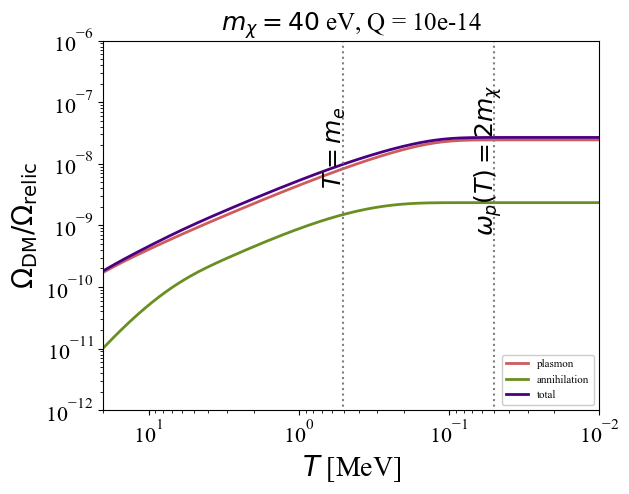

In [88]:
f, ax = plt.subplots()
alist = np.logspace(-1.9, 4.5,num = 500)
#ax.loglog(irr.T(alist), relic40_new/irr.nxrelic(0.04, irr.T(100))*alist**3/100**3,lw=2,c='SlateBlue',label = 'Total')
#ax.loglog(irr.T(alist), relic_plas40_new/irr.nxrelic(0.04, irr.T(100))*alist**3/100**3,lw=2,c='mediumvioletred',label = '$\gamma$')
ax.loglog(irr.T(alist), relic_plas40m14/irr.nxrelic(4e-5, irr.T(100))*alist**3/100**3,lw=2,c='IndianRed',label = r'plasmon')
ax.loglog(irr.T(alist), relic_ann40m14/irr.nxrelic(4e-5, irr.T(100))*alist**3/100**3,lw=2,c='olivedrab',label = r'annihilation')
ax.loglog(irr.T(alist), relic_40m14/irr.nxrelic(4e-5, irr.T(100))*alist**3/100**3,lw=2,c='indigo',label = r'total')
ax.loglog(irr.T(alist), np.ones_like(alist), lw=3, c='gray', alpha=0.5)

ax.set_ylabel(r'$\Omega_\mathrm{DM}/\Omega_\mathrm{relic}$', fontsize=20)
ax.set_xlabel(r'$T$ [MeV]', fontsize=20)
ax.set_title(r'$m_\chi= 40$ eV, Q = 10e-14', fontsize=18)
ax.set_xlim([20,0.01])
ax.set_ylim([10e-13, 10e-7])
#ax.set_xticklabels(xticklabels,fontsize=16)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)

ax.vlines(scipy.optimize.fsolve(lambda t: irr.wp(t)-2 *4e-5, 1), 1e-20,1e2, color='gray',linestyles=":")
ax.vlines(irr.me, 1e-20,1e2,color='gray',linestyles=":")

ax.text(0.7, 0.000000005, r'$T = m_e$',rotation=90,fontsize=18)
ax.text(0.07, 0.000000001, r'$\omega_p(T) = 2 m_\chi$',rotation=90, fontsize=18)
#ax.text(16, 0.3, r'$m_\chi = 40$ keV',fontsize=20)

ax.legend(framealpha=1, loc='lower right', fontsize=8)


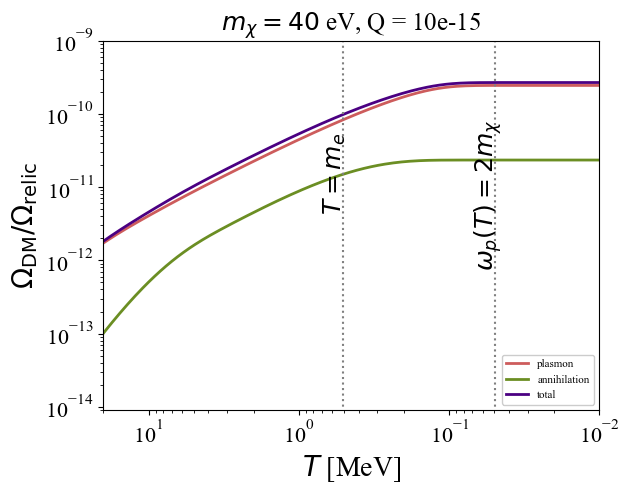

In [36]:
f, ax = plt.subplots()
alist = np.logspace(-1.9, 4.5,num = 500)
#ax.loglog(irr.T(alist), relic40_new/irr.nxrelic(0.04, irr.T(100))*alist**3/100**3,lw=2,c='SlateBlue',label = 'Total')
#ax.loglog(irr.T(alist), relic_plas40_new/irr.nxrelic(0.04, irr.T(100))*alist**3/100**3,lw=2,c='mediumvioletred',label = '$\gamma$')
ax.loglog(irr.T(alist), relic_plas40m15/irr.nxrelic(4e-5, irr.T(100))*alist**3/100**3,lw=2,c='IndianRed',label = r'plasmon')
ax.loglog(irr.T(alist), relic_ann40m15/irr.nxrelic(4e-5, irr.T(100))*alist**3/100**3,lw=2,c='olivedrab',label = r'annihilation')
ax.loglog(irr.T(alist), relic_40m15/irr.nxrelic(4e-5, irr.T(100))*alist**3/100**3,lw=2,c='indigo',label = r'total')
ax.loglog(irr.T(alist), np.ones_like(alist), lw=3, c='gray', alpha=0.5)

ax.set_ylabel(r'$\Omega_\mathrm{DM}/\Omega_\mathrm{relic}$', fontsize=20)
ax.set_xlabel(r'$T$ [MeV]', fontsize=20)
ax.set_title(r'$m_\chi= 40$ eV, Q = 10e-15', fontsize=18)
ax.set_xlim([20,0.01])
ax.set_ylim([9e-15, 10e-10])
#ax.set_xticklabels(xticklabels,fontsize=16)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)

ax.vlines(scipy.optimize.fsolve(lambda t: irr.wp(t)-2 *4e-5, 1), 1e-20,1e2, color='gray',linestyles=":")
ax.vlines(irr.me, 1e-20,1e2,color='gray',linestyles=":")

ax.text(0.7, 0.000000000005, r'$T = m_e$',rotation=90,fontsize=18)
ax.text(0.07, 0.000000000001, r'$\omega_p(T) = 2 m_\chi$',rotation=90, fontsize=18)
#ax.text(16, 0.3, r'$m_\chi = 40$ keV',fontsize=20)
#ax.text(0.65, 0.005, r'$T = m_e$',rotation=90,fontsize=18)
#ax.text(1.2, 0.003, r'$\omega_p(T) = 2 m_\chi$',rotation=90, fontsize=18)
#ax.text(16, 0.3, r'$m_\chi = 40$ keV',fontsize=20)

ax.legend(framealpha=1, loc='lower right', fontsize=8)


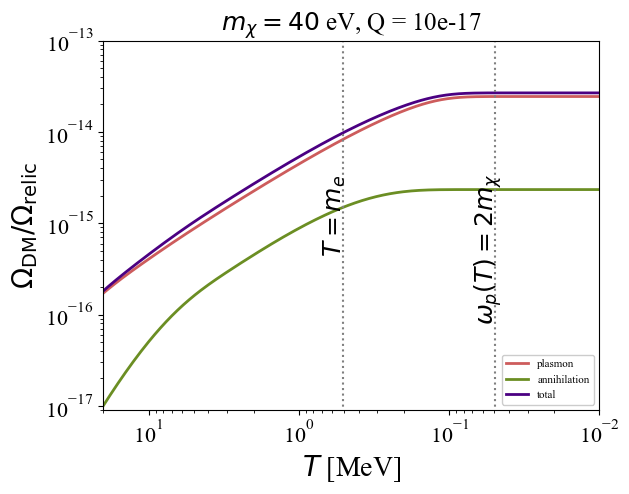

In [42]:
f, ax = plt.subplots()
alist = np.logspace(-1.9, 4.5,num = 500)
#ax.loglog(irr.T(alist), relic40_new/irr.nxrelic(0.04, irr.T(100))*alist**3/100**3,lw=2,c='SlateBlue',label = 'Total')
#ax.loglog(irr.T(alist), relic_plas40_new/irr.nxrelic(0.04, irr.T(100))*alist**3/100**3,lw=2,c='mediumvioletred',label = '$\gamma$')
ax.loglog(irr.T(alist), relic_plas40m17/irr.nxrelic(4e-5, irr.T(100))*alist**3/100**3,lw=2,c='IndianRed',label = r'plasmon')
ax.loglog(irr.T(alist), relic_ann40m17/irr.nxrelic(4e-5, irr.T(100))*alist**3/100**3,lw=2,c='olivedrab',label = r'annihilation')
ax.loglog(irr.T(alist), relic_40m17/irr.nxrelic(4e-5, irr.T(100))*alist**3/100**3,lw=2,c='indigo',label = r'total')
ax.loglog(irr.T(alist), np.ones_like(alist), lw=3, c='gray', alpha=0.5)

ax.set_ylabel(r'$\Omega_\mathrm{DM}/\Omega_\mathrm{relic}$', fontsize=20)
ax.set_xlabel(r'$T$ [MeV]', fontsize=20)
ax.set_title(r'$m_\chi= 40$ eV, Q = 10e-17', fontsize=18)
ax.set_xlim([20,0.01])
ax.set_ylim([9e-18, 10e-14])
#ax.set_xticklabels(xticklabels,fontsize=16)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)

ax.vlines(scipy.optimize.fsolve(lambda t: irr.wp(t)-2 *4e-5, 1), 1e-20,1e2, color='gray',linestyles=":")
ax.vlines(irr.me, 1e-20,1e2,color='gray',linestyles=":")

ax.text(0.7, 0.0000000000000005, r'$T = m_e$',rotation=90,fontsize=18)
ax.text(0.07, 0.0000000000000001, r'$\omega_p(T) = 2 m_\chi$',rotation=90, fontsize=18)
#ax.text(16, 0.3, r'$m_\chi = 40$ keV',fontsize=20)
#ax.text(0.65, 0.005, r'$T = m_e$',rotation=90,fontsize=18)
#ax.text(1.2, 0.003, r'$\omega_p(T) = 2 m_\chi$',rotation=90, fontsize=18)
#ax.text(16, 0.3, r'$m_\chi = 40$ keV',fontsize=20)

ax.legend(framealpha=1, loc='lower right', fontsize=8)


In [96]:
relic_4m15 = irr.relic(10e-15, 4e-6,whole_shebang = True)
relic_400m15 = irr.relic(10e-15, 4e-4,whole_shebang = True)

/Users/ellailes/anaconda3/envs/power-spectra/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/ellailes/Code/Irreducible-mcp/irreducible_library.py:454: RuntimeWarning: overflow encountered in exp
  /(3*wt*mt**2 *(np.exp(wt/T)-1))


[2.67550331e-11]
[2.62852142e-09]


In [97]:
relic_40m15 = irr.relic(10e-15, 4e-5,whole_shebang = True)
relic_400keVm15 = irr.relic(10e-15, 0.4,whole_shebang = True)

/Users/ellailes/anaconda3/envs/power-spectra/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/ellailes/Code/Irreducible-mcp/irreducible_library.py:454: RuntimeWarning: overflow encountered in exp
  /(3*wt*mt**2 *(np.exp(wt/T)-1))


[2.67429704e-10]
[2.82527417e-07]


/Users/ellailes/anaconda3/envs/power-spectra/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


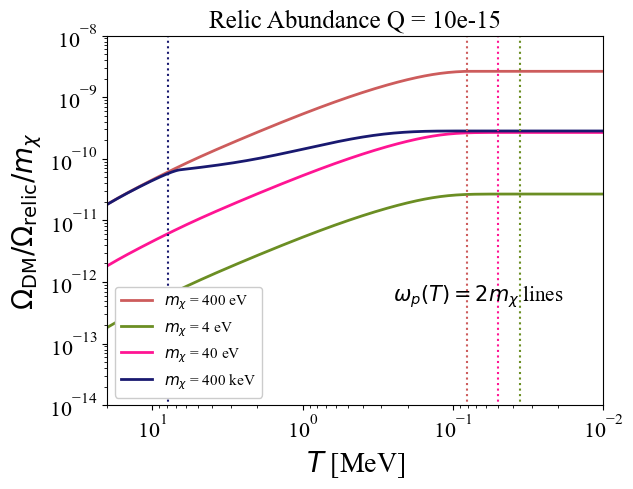

In [101]:
f, ax = plt.subplots()
alist = np.logspace(-1.9, 4.5,num = 500)
#ax.loglog(irr.T(alist), relic40_new/irr.nxrelic(0.04, irr.T(100))*alist**3/100**3,lw=2,c='SlateBlue',label = 'Total')
#ax.loglog(irr.T(alist), relic_plas40_new/irr.nxrelic(0.04, irr.T(100))*alist**3/100**3,lw=2,c='mediumvioletred',label = '$\gamma$')
ax.loglog(irr.T(alist), relic_400m15/irr.nxrelic(4e-4, irr.T(100))*alist**3/100**3,lw=2,c='IndianRed',label = r'$m_\chi$ = 400 eV')
ax.loglog(irr.T(alist), relic_4m15/irr.nxrelic(4e-6, irr.T(100))*alist**3/100**3,lw=2,c='olivedrab',label = r'$m_\chi$ = 4 eV')
ax.loglog(irr.T(alist), relic_40m15/irr.nxrelic(4e-5, irr.T(100))*alist**3/100**3,lw=2,c='deeppink',label = r'$m_\chi$ = 40 eV')
ax.loglog(irr.T(alist), relic_400keVm15/irr.nxrelic(4e-4, irr.T(100))*alist**3/100**3,lw=2,c='midnightblue',label = r'$m_\chi$ = 400 keV')


ax.set_ylabel(r'$\Omega_\mathrm{DM}/\Omega_\mathrm{relic}/m_\chi$', fontsize=20)
ax.set_xlabel(r'$T$ [MeV]', fontsize=20)
ax.set_title(r'Relic Abundance Q = 10e-15', fontsize=18)
ax.set_xlim([20,0.01])
ax.set_ylim([10e-15, 10e-9])
#ax.set_xticklabels(xticklabels,fontsize=16)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)

ax.vlines(scipy.optimize.fsolve(lambda t: irr.wp(t)-2 *4e-6, 1), 1e-20,1e2, color='olivedrab',linestyles=":")
ax.vlines(scipy.optimize.fsolve(lambda t: irr.wp(t)-2 *4e-4, 1), 1e-20,1e2, color='Indianred',linestyles=":")
ax.vlines(scipy.optimize.fsolve(lambda t: irr.wp(t)-2 *4e-5, 1), 1e-20,1e2, color='deeppink',linestyles=":")
ax.vlines(scipy.optimize.fsolve(lambda t: irr.wp(t)-2 *0.4, 1), 1e-20,1e2, color='midnightblue',linestyles=":")

ax.text(0.25, 0.0000000000005, r'$\omega_p(T) = 2 m_\chi$ lines',rotation=0,fontsize=15)
#ax.text(0.07, 0.00000001, r'$\omega_p(T) = 2 m_\chi$',rotation=90, fontsize=18)
#ax.text(16, 0.3, r'$m_\chi = 40$ keV',fontsize=20)
#ax.text(0.65, 0.005, r'$T = m_e$',rotation=90,fontsize=18)
#ax.text(1.2, 0.003, r'$\omega_p(T) = 2 m_\chi$',rotation=90, fontsize=18)
#ax.text(16, 0.3, r'$m_\chi = 40$ keV',fontsize=20)

ax.legend(framealpha=1, loc='lower left', fontsize=11)

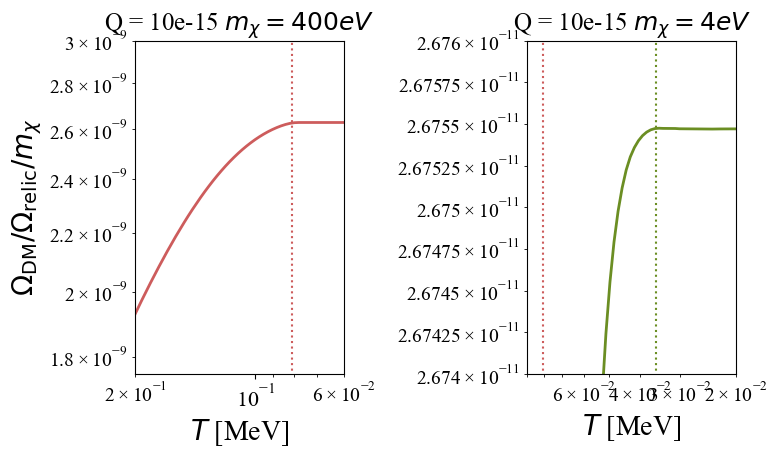

In [143]:
f, axs = plt.subplots(1,2)
f.set_figwidth(8)
alist = np.logspace(-1.9, 4.5,num = 500)
#ax.loglog(irr.T(alist), relic40_new/irr.nxrelic(0.04, irr.T(100))*alist**3/100**3,lw=2,c='SlateBlue',label = 'Total')
#ax.loglog(irr.T(alist), relic_plas40_new/irr.nxrelic(0.04, irr.T(100))*alist**3/100**3,lw=2,c='mediumvioletred',label = '$\gamma$')
ax = axs[0]
ax.loglog(irr.T(alist), relic_400m15/irr.nxrelic(4e-4, irr.T(100))*alist**3/100**3,lw=2,c='IndianRed',label = r'$m_\chi$ = 400 eV')

ax.set_ylabel(r'$\Omega_\mathrm{DM}/\Omega_\mathrm{relic}/m_\chi$', fontsize=20)
ax.set_xlabel(r'$T$ [MeV]', fontsize=20)
ax.set_title(r'Q = 10e-15 $m_\chi=400eV$', fontsize=18)
ax.set_xlim([0.2,0.06])
ax.set_ylim([1.75e-9, 3e-9])
#ax.set_xticklabels(xticklabels,fontsize=16)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)

ax.vlines(scipy.optimize.fsolve(lambda t: irr.wp(t)-2 *4e-4, 1), 1e-20,1e2, color='Indianred',linestyles=":")

ax = axs[1]

ax.loglog(irr.T(alist), relic_4m15/irr.nxrelic(4e-6, irr.T(100))*alist**3/100**3,lw=2,c='olivedrab',label = r'$m_\chi$ = 4 eV')

ax.set_xlabel(r'$T$ [MeV]', fontsize=20)
ax.set_title(r'Q = 10e-15 $m_\chi=4eV$', fontsize=18)
ax.set_xlim([0.09,0.02])
ax.set_ylim([2.674e-11, 2.676e-11])
#ax.set_xticklabels(xticklabels,fontsize=16)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)

ax.vlines(scipy.optimize.fsolve(lambda t: irr.wp(t)-2 *4e-6, 1), 1e-20,1e2, color='olivedrab',linestyles=":")
ax.vlines(scipy.optimize.fsolve(lambda t: irr.wp(t)-2 *4e-4, 1), 1e-20,1e2, color='Indianred',linestyles=":")

f.tight_layout()


## Initial Condition Determinator:

Text(20, 1e-16, '$\\omega_p(T) = 2 * 400keV$')

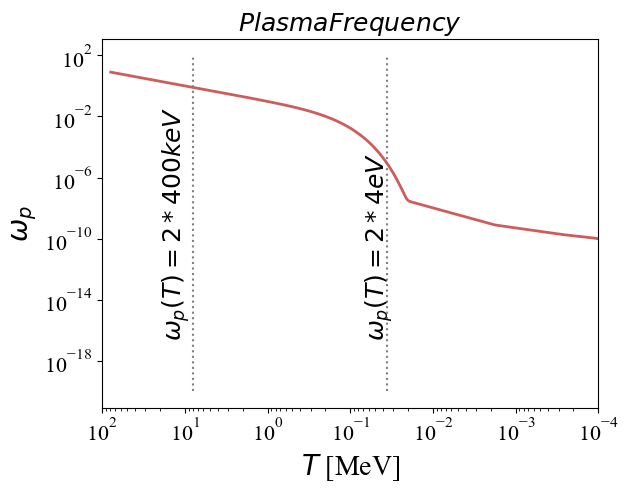

In [58]:
f, ax = plt.subplots()
alist = np.logspace(-1.9, 4.5,num = 500)
#ax.loglog(irr.T(alist), relic40_new/irr.nxrelic(0.04, irr.T(100))*alist**3/100**3,lw=2,c='SlateBlue',label = 'Total')
#ax.loglog(irr.T(alist), relic_plas40_new/irr.nxrelic(0.04, irr.T(100))*alist**3/100**3,lw=2,c='mediumvioletred',label = '$\gamma$')
ax.loglog(irr.T(alist), np.array([irr.wp(i) for i in irr.T(alist)]),lw=2,c='IndianRed',label = r'plasmon')

ax.set_ylabel(r'$\omega_p$', fontsize=20)
ax.set_xlabel(r'$T$ [MeV]', fontsize=20)
ax.set_title(r'$Plasma Frequency$', fontsize=18)
ax.set_xlim([100,0.0001])
#ax.set_ylim([9e-18, 10e-14])
#ax.set_xticklabels(xticklabels,fontsize=16)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)

ax.vlines(scipy.optimize.fsolve(lambda t: irr.wp(t)-2 *4e-6, 1), 1e-20,1e2, color='gray',linestyles=":")

ax.text(0.07, 0.0000000000000001, r'$\omega_p(T) = 2 * 4eV$',rotation=90, fontsize=18)

ax.vlines(scipy.optimize.fsolve(lambda t: irr.wp(t)-2 *0.4, 1), 1e-20,1e2, color='gray',linestyles=":")

ax.text(20, 0.0000000000000001, r'$\omega_p(T) = 2 * 400keV$',rotation=90, fontsize=18)


#ax.legend(framealpha=1, loc='lower right', fontsize=8)


In [5]:
# How long the plasmons are decaying if m_chi = 1eV
print(scipy.optimize.fsolve(lambda t: irr.wp(t)-2 *0.000001, 1))
print(irr.a(0.03073833))


[0.03073833]
45.296429093338205


/Users/ellailes/anaconda3/envs/power-spectra/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


In [21]:
print(irr.relic_ann(1.8e-11,1))
print(irr.relic_plas(1.8e-11,1))
print(irr.relic(1.8e-11,1))

0.8473611587117564


/Users/ellailes/Code/Irreducible-mcp/irreducible_library.py:217: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  return fsolve(lambda w: Pi_t(T, k, w)+k**2-w**2, k)


0.1507288159277221
0.9980909202179598


In [29]:
mlist = np.logspace(-1,3,num = 50)
arr = np.empty((2,50))
for i in range(50):
    arr[0][i] = irr.relic_ann(1.8e-11,mlist[i])
    arr[1][i] = irr.relic_plas(1.8e-11,mlist[i])

/Users/ellailes/Code/Irreducible-mcp/irreducible_library.py:351: RuntimeWarning: invalid value encountered in sqrt
  integrandmu = lambda s: Q**2*e**4/(2*np.pi*s**2)*np.sqrt(1 - 4*mx**2/s)\
/Users/ellailes/Code/Irreducible-mcp/irreducible_library.py:357: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  +integrate.quad(integrandmu, 4*mmu**2, np.inf)[0]


In [41]:
Q = irr.relic(1.8e-11,5)

In [42]:
print(np.sqrt(1/Q)*1.8e-11)

2.1687749426772836e-11


In [31]:
normann = arr[0]/(arr[0]+arr[1])
normplas = arr[1]/(arr[0]+arr[1])

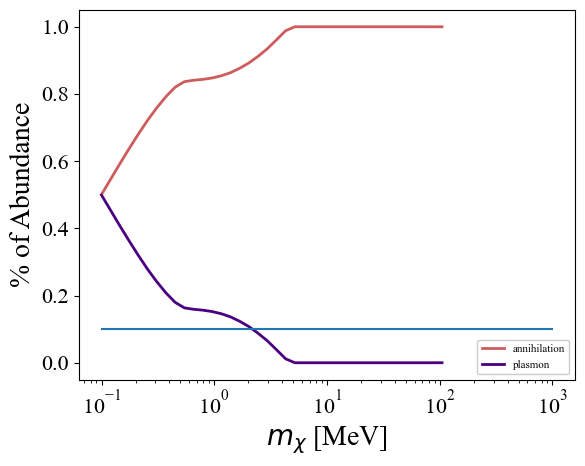

In [34]:
f, ax = plt.subplots()
alist = np.logspace(-1.9, 4.5,num = 500)

ax.plot(mlist, normann,lw=2,c='IndianRed',label = r'annihilation')
ax.plot(mlist, normplas,lw=2,c='indigo',label = r'plasmon')
ax.plot(mlist,np.linspace(0.1,0.1,num=50))
ax.set_xscale("log")
ax.set_ylabel(r'% of Abundance', fontsize=20)
ax.set_xlabel(r'$m_\chi$ [MeV]', fontsize=20)
#ax.set_title(r'$Plasma Frequency$', fontsize=18)
#ax.set_xlim([100,0.0001])
#ax.set_ylim([9e-18, 10e-14])
#ax.set_xticklabels(xticklabels,fontsize=16)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)


ax.legend(framealpha=1, loc='lower right', fontsize=8)
